## Importing Libraries & Dataset

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist

In [101]:
(X_train, y_train),(X_test, y_test) = mnist.load_data()

In [102]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

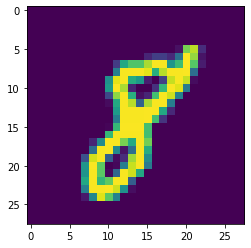

In [71]:
plt.imshow(X_train[17])

In [72]:
X_train = X_train/255
X_test = X_test/255

## Building Convolutional Autoencoder

In [73]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Reshape
from keras.optimizers import SGD

In [74]:
encoder = Sequential()

In [75]:
encoder.add(Flatten(input_shape=[28,28]))
encoder.add(Dense(units=400, activation='relu'))
encoder.add(Dense(units=200, activation='relu'))
encoder.add(Dense(units=100, activation='relu'))
encoder.add(Dense(units=50, activation='relu'))
encoder.add(Dense(units=25, activation='relu'))
encoder.add(Dense(units=10, activation='relu'))

In [76]:
decoder = Sequential()

In [77]:
decoder.add(Dense(25, activation='relu', input_shape=[10]))
decoder.add(Dense(50, activation='relu'))
decoder.add(Dense(100, activation='relu'))
decoder.add(Dense(200, activation='relu'))
decoder.add(Dense(400, activation='relu'))
decoder.add(Dense(784, activation='sigmoid'))
decoder.add(Reshape([28,28]))

In [78]:
autoencoder = Sequential([encoder, decoder])

In [79]:
autoencoder.compile(loss='binary_crossentropy', optimizer=SGD(learning_rate=1.5))

In [80]:
autoencoder.fit(X_train, X_train, epochs=10, validation_data=[X_train, X_train])

Train on 60000 samples, validate on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 72s 1ms/step - loss: 0.2555 - val_loss: 0.2336
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2224 - val_loss: 0.2083
Epoch 3/10
60000/60000 [==============================] - 74s 1ms/step - loss: 0.1951 - val_loss: 0.1789
Epoch 4/10
60000/60000 [==============================] - 71s 1ms/step - loss: 0.1729 - val_loss: 0.1693
Epoch 5/10
60000/60000 [==============================] - 77s 1ms/step - loss: 0.1625 - val_loss: 0.1611
Epoch 6/10
60000/60000 [==============================] - 69s 1ms/step - loss: 0.1562 - val_loss: 0.1511
Epoch 7/10
60000/60000 [==============================] - 56s 939us/step - loss: 0.1520 - val_loss: 0.1471
Epoch 8/10
60000/60000 [==============================] - 55s 918us/step - loss: 0.1482 - val_loss: 0.1471
Epoch 9/10
60000/60000 [==============================] - 57s 951us/step - loss: 0.1443 - val_loss: 0.1414

In [85]:
y_pred = autoencoder.predict(X_test)

In [86]:
from matplotlib.image import imread
y_pred[0].shape

(28, 28)

THE CORRECT DIGIT IS : 6


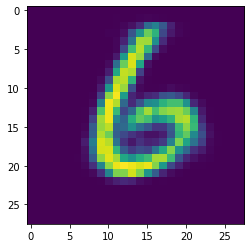

In [105]:
n=123
print("THE CORRECT DIGIT IS :",y_test[n])
plt.imshow(y_pred[n])